In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2

## 0. EDA och filhantering

b)

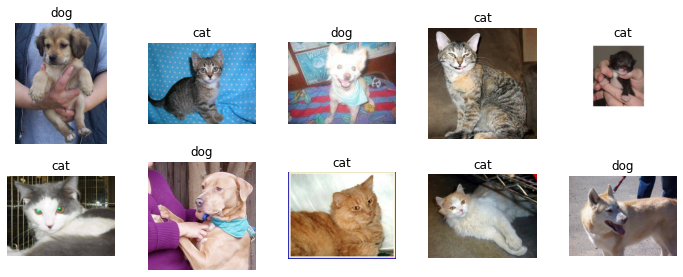

In [7]:
from dataset_split import get_filenames_from_path, gen_filename_dataframe
from image_operations import display_images

original_train_dir = os.path.abspath("./original_data/train/train")
train_pictures_filenames = get_filenames_from_path(original_train_dir)
train_pictures_one_hot = gen_filename_dataframe(train_pictures_filenames)

display_images(train_pictures_one_hot, original_train_dir)

In [8]:
train_pictures_one_hot.head()

,filename,label
0,dog.8011.jpg,0
1,cat.5077.jpg,1
2,dog.7322.jpg,0
3,cat.2718.jpg,1
4,cat.10151.jpg,1


c) Folder structure is created by running script *folder_structure.py*  

d)

In [11]:
from dataset_split import Complete_set_split_filenames

small_train_filenames, small_val_filenames, small_test_filenames = Complete_set_split_filenames(train_pictures_one_hot, (800,200,250))
tiny_train_filenames, tiny_val_filenames, tiny_test_filemnames = Complete_set_split_filenames(train_pictures_one_hot, (80,20,25))
small_train_filenames.label.count()

1600

In [12]:
train_pictures_one_hot.shape # [0] Should decrease each time as Complete split filenames is run, as Inplace = True, thus we avoid data leakage

(19500, 2)

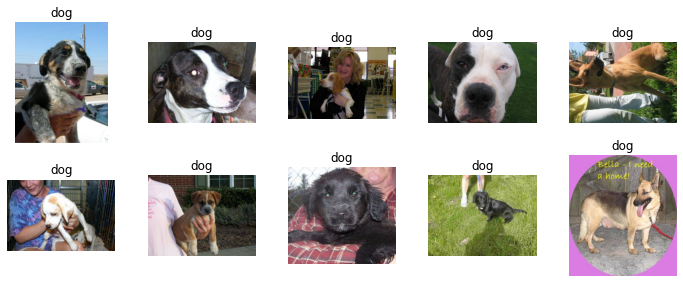

In [13]:
display_images(small_train_filenames, original_train_dir)

<AxesSubplot:xlabel='label', ylabel='count'>

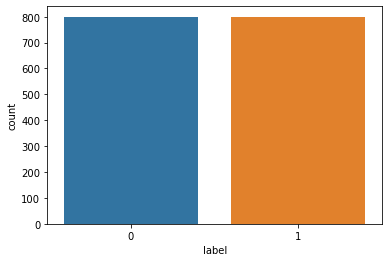

In [14]:
sns.countplot(data=small_train_filenames, x='label')

## 1. Bildbehandling

a)

In [15]:
from image_operations import extract_dimesion_distribution

small_train_sizes, small_train_oversized_pictures = extract_dimesion_distribution(small_train_filenames,original_train_dir)
small_val_sizes, small_val_oversized_pictures = extract_dimesion_distribution(small_val_filenames,original_train_dir)
small_test_sizes, small_test_oversized_pictures = extract_dimesion_distribution(small_test_filenames,original_train_dir)

small_sets_sizes = [small_train_sizes, small_val_sizes, small_test_sizes]

oversized pictures : []
oversized pictures : []
oversized pictures : []


In [16]:
len(small_train_sizes), len(small_train_filenames), len(small_val_sizes), len(small_val_filenames), len(small_test_filenames)

(1600, 1600, 400, 400, 500)

In [17]:
small_sets = [small_train_filenames, small_val_filenames, small_test_filenames]

for set in small_sets:
    set.reset_index(inplace=True)


small_train_dimesions_df = pd.DataFrame(small_train_sizes, columns =['height', 'width'])
small_train_with_dims = pd.concat([small_train_filenames, small_train_dimesions_df], axis = 1)

small_val_dimesions_df = pd.DataFrame(small_val_sizes, columns =['height', 'width'])
small_val_with_dims = pd.concat([small_val_filenames, small_val_dimesions_df], axis = 1)

small_test_dimesions_df = pd.DataFrame(small_test_sizes, columns =['height', 'width'])
small_test_with_dims = pd.concat([small_test_filenames, small_test_dimesions_df], axis = 1)

len(small_train_with_dims), len(small_val_with_dims), len(small_test_with_dims)

(1600, 400, 500)

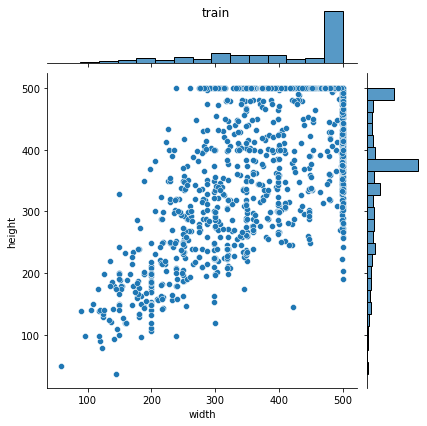

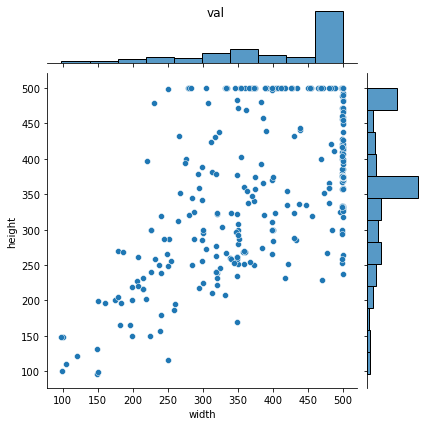

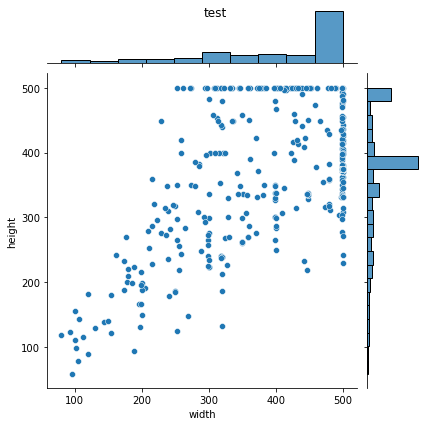

In [18]:
dims_dfs = [small_train_with_dims, small_val_with_dims, small_test_with_dims]
titles = ["train", "val", "test"]

for df, title in zip(dims_dfs, titles):
    sns.jointplot(data=df, x='width', y='height').fig.suptitle(title)




En storlek av 299 x 299 tillåter att de flesta är minskade, samt att vi inte behöver uppscala många av bilderna.

In [19]:
squares = [img for img in small_train_sizes if img[0] == img[1]]
len(squares)
print(f"ratio squares : {len(squares)/len(small_test_with_dims)}")

ratio squares : 0.0


In [20]:
condition = 'height <100 and width <100'
too_small_pics_train = small_train_with_dims.query(condition)
too_small_pics_val = small_val_with_dims.query(condition)
too_small_pics_test = small_test_with_dims.query(condition)

too_small_pics = too_small_pics_train, too_small_pics_val, too_small_pics_test
too_small_pics_train

,index,filename,label,height,width
515,4958,dog.8570.jpg,0,50,59
844,20555,cat.5257.jpg,1,99,96


In [21]:
small_train_with_dims.drop(too_small_pics_train.index, axis = 0, inplace = True)
small_val_with_dims.drop(too_small_pics_val.index, axis = 0, inplace = True)
small_test_with_dims.drop(too_small_pics_test.index, axis = 0, inplace = True)



small_test_with_dims

,index,filename,label,height,width
0,9254,dog.728.jpg,0,349,238
1,7151,dog.54.jpg,0,284,400
2,12419,dog.5546.jpg,0,500,448
3,17856,dog.3077.jpg,0,497,416
4,1528,dog.5534.jpg,0,439,320
...,...,...,...,...,...
495,13658,cat.4048.jpg,1,299,350
496,8574,cat.7947.jpg,1,374,500
497,19649,cat.2670.jpg,1,481,500
498,8204,cat.10253.jpg,1,499,398


In [22]:
from image_operations import read_and_resize_images
X_train_small = read_and_resize_images(small_train_with_dims, original_train_dir,(299,299))
X_val_small = read_and_resize_images(small_val_with_dims, original_train_dir,(299,299))
X_test_small = read_and_resize_images(small_test_with_dims, original_train_dir,(299,299))

In [23]:
X_train_small.shape, X_val_small.shape, X_test_small.shape

((1598, 299, 299, 3), (400, 299, 299, 3), (499, 299, 299, 3))

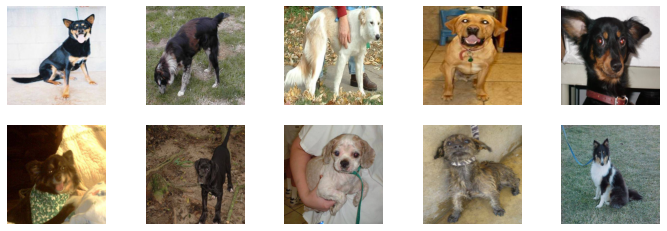

In [24]:
from image_operations import display_images_array

display_images_array(X_val_small)

In [25]:
y_small_train = small_train_with_dims['label']
y_small_val = small_val_with_dims['label']
y_small_test = small_test_with_dims['label']

In [39]:
y_small_test

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: label, Length: 499, dtype: int64

In [27]:
X_sets = [X_train_small, X_val_small, X_test_small]
X_sets_scaled =[]
for X_set in X_sets :
    X_set = X_set.astype("float32")/255
    X_sets_scaled.append(X_set)

X_train = X_sets_scaled[0]
X_val = X_sets_scaled[1] 
X_test = X_sets_scaled[2]

X_train

array([[[[0.5254902 , 0.7254902 , 0.93333334],
         [0.5254902 , 0.7254902 , 0.93333334],
         [0.5254902 , 0.7254902 , 0.93333334],
         ...,
         [0.5058824 , 0.7019608 , 0.93333334],
         [0.5058824 , 0.7019608 , 0.93333334],
         [0.52156866, 0.69411767, 0.87058824]],

        [[0.5254902 , 0.7254902 , 0.93333334],
         [0.5254902 , 0.7254902 , 0.93333334],
         [0.5254902 , 0.7254902 , 0.93333334],
         ...,
         [0.5058824 , 0.7019608 , 0.93333334],
         [0.5058824 , 0.7019608 , 0.93333334],
         [0.52156866, 0.69411767, 0.87058824]],

        [[0.5254902 , 0.7254902 , 0.93333334],
         [0.5254902 , 0.7254902 , 0.93333334],
         [0.5254902 , 0.7254902 , 0.93333334],
         ...,
         [0.5058824 , 0.7019608 , 0.93333334],
         [0.5058824 , 0.7019608 , 0.93333334],
         [0.52156866, 0.69411767, 0.87058824]],

        ...,

        [[0.21960784, 0.16470589, 0.16470589],
         [0.21960784, 0.16470589, 0.16470589]

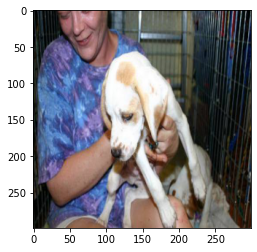

In [28]:
plt.imshow(X_train[5])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(
    rotation_range=30,
    shear_range=.2,
    zoom_range=.1,
    horizontal_flip=False,
    height_shift_range=.2,
    width_shift_range=.2
)


test_image_generator = ImageDataGenerator()

train_generator = train_image_generator.flow(
    X_train, y_small_train, batch_size=32)

val_generator = test_image_generator.flow(X_val, y_small_val, batch_size=32)

train_generator, val_generator

(<keras.preprocessing.image.NumpyArrayIterator at 0x13421f5e0>,
 <keras.preprocessing.image.NumpyArrayIterator at 0x1351379d0>)

2
(32, 299, 299, 3)


array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

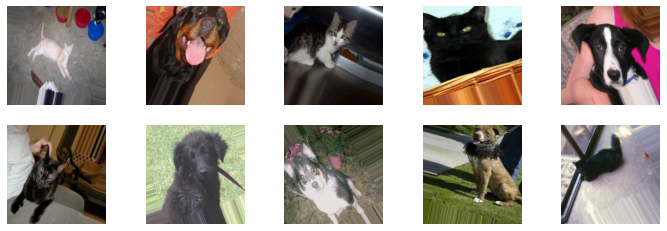

In [23]:
print(len(train_generator.next()))

sample_batch = train_generator.next()
print(sample_batch[0].shape) # 32 samples in a batch

display_images_array(sample_batch[0])
sample_batch[1]

In [29]:
X_train.shape[1:]

(299, 299, 3)

In [30]:
steps_per_epoch = int(len(X_train)/32)
validation_steps = int(len(X_val)/32)

steps_per_epoch, validation_steps

(49, 12)

In [26]:
from CNN_models import CNN_model_1

model = CNN_model_1(X_train.shape, drop_rate=.3)
model.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0 

In [27]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopper = EarlyStopping(monitor = "val_acc", mode = "max", patience = 5, restore_best_weights = True)

model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 100,
    callbacks = [early_stopper],
    validation_data = val_generator,
    validation_steps = validation_steps
)



2022-05-14 22:04:08.325497: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
49/49 [==============================] - 55s 1s/step - loss: 1.8375 - acc: 0.5275 - val_loss: 0.6845 - val_acc: 0.5755
Epoch 2/100
49/49 [==============================] - 55s 1s/step - loss: 0.6969 - acc: 0.5326 - val_loss: 0.6889 - val_acc: 0.5443
Epoch 3/100
49/49 [==============================] - 56s 1s/step - loss: 0.6887 - acc: 0.5281 - val_loss: 0.6919 - val_acc: 0.5026
Epoch 4/100
49/49 [==============================] - 56s 1s/step - loss: 0.6852 - acc: 0.5294 - val_loss: 0.6726 - val_acc: 0.5807
Epoch 5/100
49/49 [==============================] - 55s 1s/step - loss: 0.6860 - acc: 0.5601 - val_loss: 0.7148 - val_acc: 0.4714
Epoch 6/100
49/49 [==============================] - 56s 1s/step - loss: 0.6857 - acc: 0.5518 - val_loss: 0.6640 - val_acc: 0.5807
Epoch 7/100
49/49 [==============================] - 55s 1s/step - loss: 0.6894 - acc: 0.5377 - val_loss: 0.6769 - val_acc: 0.5417
Epoch 8/100
49/49 [==============================] - 56s 1s/step - loss: 0.6826 - a

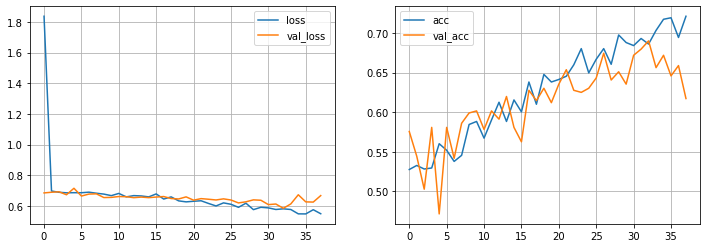

In [28]:
metrics = pd.DataFrame(model.history.history)


def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], grid = True)

plot_metrics(metrics)



Attemps with other image generation parameters and more patience on the early stopping

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_image_generator_gen_2 = ImageDataGenerator(
    rotation_range=50,
    shear_range=.2,
    zoom_range=.1,
    horizontal_flip=False,
    vertical_flip=True,
    height_shift_range=.2,
    width_shift_range=.2
)


test_image_generator = ImageDataGenerator()

train_generator = train_image_generator_gen_2.flow(
    X_train, y_small_train, batch_size=32)

val_generator = test_image_generator.flow(X_val, y_small_val, batch_size=32)

train_generator, val_generator

(<keras.preprocessing.image.NumpyArrayIterator at 0x14b896fa0>,
 <keras.preprocessing.image.NumpyArrayIterator at 0x12f2c90a0>)

In [32]:
from CNN_models import CNN_model_2

model_2 = CNN_model_2(X_train.shape, drop_rate=.2)
model_2.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0 

In [33]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopper = EarlyStopping(monitor = "val_acc", mode = "max", patience = 10, restore_best_weights = True)

model_2.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 100,
    callbacks = [early_stopper],
    validation_data = val_generator,
    validation_steps = validation_steps
)

2022-05-15 12:51:01.418012: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
49/49 [==============================] - 57s 1s/step - loss: 4.7104 - acc: 0.5096 - val_loss: 0.6961 - val_acc: 0.5104
Epoch 2/100
49/49 [==============================] - 56s 1s/step - loss: 0.8935 - acc: 0.5051 - val_loss: 0.6958 - val_acc: 0.5104
Epoch 3/100
49/49 [==============================] - 55s 1s/step - loss: 0.7184 - acc: 0.4974 - val_loss: 0.6922 - val_acc: 0.5286
Epoch 4/100
49/49 [==============================] - 55s 1s/step - loss: 0.7237 - acc: 0.5236 - val_loss: 0.7073 - val_acc: 0.5104
Epoch 5/100
49/49 [==============================] - 55s 1s/step - loss: 0.7225 - acc: 0.5473 - val_loss: 0.6862 - val_acc: 0.5417
Epoch 6/100
49/49 [==============================] - 55s 1s/step - loss: 0.7595 - acc: 0.5536 - val_loss: 0.6659 - val_acc: 0.5703
Epoch 7/100
49/49 [==============================] - 55s 1s/step - loss: 0.6898 - acc: 0.5932 - val_loss: 0.6853 - val_acc: 0.6094
Epoch 8/100
49/49 [==============================] - 55s 1s/step - loss: 0.6907 - a

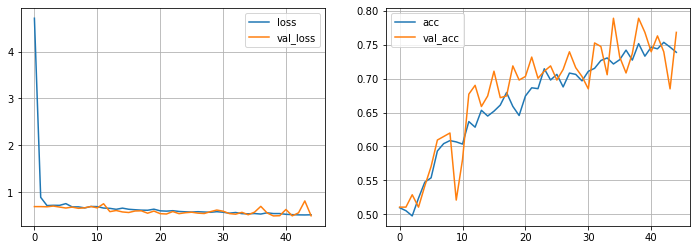

In [35]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], grid = True)

metrics_2 = pd.DataFrame(model_2.history.history)
plot_metrics(metrics_2)


              precision    recall  f1-score   support

           0       0.77      0.68      0.72       250
           1       0.71      0.80      0.75       249

    accuracy                           0.74       499
   macro avg       0.74      0.74      0.74       499
weighted avg       0.74      0.74      0.74       499



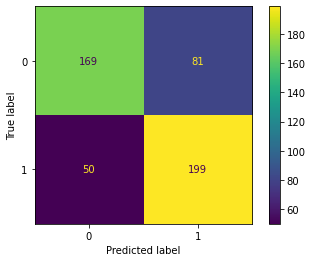

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_2.predict(X_test)
y_pred = np.round(y_pred) #Transforms coninous y_pred into binary

print(classification_report(y_small_test, y_pred))
cm = confusion_matrix(y_small_test, y_pred)
ConfusionMatrixDisplay(cm).plot()



In [46]:
models_save_path = os.path.abspath("./saved_kerad_models")
model_2.save(models_save_path)

2022-05-15 14:00:30.385651: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/leolassarade/GitHub-project/Deep-Learning-21/Labb/saved_kerad_models/assets
